In [1]:
from pycaret.datasets import get_data
df = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
1 - 26831630.32 / df['charges'].var()

1 - 23947200.24 / df['charges'].var()

0.8367077198380402

In [15]:
import numpy as np

y = np.array([1,1,1,1,1,1,1,1,1,1])
yp = np.array([1,2,1.1,3,7,2,100,100,2,1])
y = [np.mean(yp)]*10

mae = np.mean(np.abs(y-yp))
mse = np.mean((y-yp) ** 2)
rmse = np.sqrt(np.mean((y-yp) ** 2))


print('mae = %.2f' % mae)
print('mse = %.2f' % mse)
print('rmse = %.2f' % rmse)


mae = 31.24
mse = 1527.27
rmse = 39.08


In [13]:
print(2.73/4.19)
print(5.85/10.93)

0.6515513126491647
0.535224153705398


In [21]:
np.sqrt(2961651.4632) / np.sqrt(21805666.0709)


0.36853801765211636

In [ ]:
326.0407 / 4658.2576	

In [20]:
2961651.4632 / 21805666.0709

0.1358202704549516

In [19]:
print(np.sqrt(21805666.0709))
print(np.sqrt(2961651.4632))

4669.653742077671
1720.944933227092


## NN CV Ergebnisse

In [2]:
import os
experiment_path = '/home/olihauke/code/federated-learning/fl-official-statistics-addon/output/experiments'
if os.getcwd() != experiment_path: os.chdir(experiment_path)
os.getcwd()


'/home/olihauke/code/federated-learning/fl-official-statistics-addon/output/experiments'

In [3]:
experiments = ['07_central_fix', '06_federated_fix']


In [4]:
os.listdir(os.path.join(experiments[0], 'results'))

['performance_overview.csv',
 'training_performance_rsq.png',
 'training_performance_mae.png',
 'performance_test_overview.csv',
 'performance_train_overview.csv',
 'performance.csv',
 'performance_test.csv']

In [5]:
import pandas as pd

In [6]:
perfs = {ex: pd.read_csv(os.path.join(ex, 'results', 'performance.csv'), sep = ";", index_col=0)for ex in experiments}

In [32]:
#perfs['07_central_fix'].filter(regex = 'test.*').assign(test_rmse = lambda x: np.sqrt(x.test_mean_squared_error)).describe()

In [21]:
perfs['07_central_fix'].filter(regex = 'test.*').assign(test_rmse = lambda x: np.sqrt(x.test_mean_squared_error)).iloc[:5].describe()

,test_loss,test_mae,test_mean_squared_error,test_r2_score,test_rmse
count,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000
mean,2.401863e+07,2700.977832,2.401863e+07,0.814515,4883.844984
std,4.398155e+06,197.874550,4.398155e+06,0.040087,456.462717
min,1.905191e+07,2415.641602,1.905191e+07,0.758861,4364.849596
25%,1.951589e+07,2604.526855,1.951589e+07,0.785901,4417.679255
50%,2.618223e+07,2764.433105,2.618223e+07,0.833140,5116.857629
75%,2.694243e+07,2785.298584,2.694243e+07,0.845066,5190.609791
max,2.840068e+07,2934.989014,2.840068e+07,0.849606,5329.228650


In [33]:
0.040087	/0.814515

0.04921579099218553

In [22]:
456.462717 / 4883.844984

0.0934638012663016

In [30]:
197.874550/2700.977832	

0.07326033840621317

In [116]:
#perfs['06_federated_fix'].filter(regex = 'test.*').assign(test_rmse = lambda x: np.sqrt(x.test_mean_squared_error)).iloc[:5].describe()

In [118]:
perfs['06_federated_fix'].filter(regex = 'test.*').assign(test_rmse = lambda x: np.sqrt(x.test_mean_squared_error)).iloc[:5].describe()

,test_loss,test_mae,test_mean_squared_error,test_r2_score,test_rmse
count,5.000000e+00,5.000000,5.000000e+00,5.000000,5.000000
mean,2.811472e+07,3584.470557,2.811472e+07,0.784059,5300.268237
std,1.745732e+06,341.617680,1.745732e+06,0.031273,165.354969
min,2.552878e+07,3174.701904,2.552878e+07,0.746083,5052.601310
25%,2.806634e+07,3306.806641,2.806634e+07,0.766295,5297.767077
50%,2.817824e+07,3649.589600,2.817824e+07,0.787516,5308.318001
75%,2.835313e+07,3786.253174,2.835313e+07,0.790509,5324.765347
max,3.044710e+07,4005.001465,3.044710e+07,0.829892,5517.889452


In [34]:
0.031273 / 0.784059

0.03988602898506363

In [28]:
165.354969 / 5300.268237

0.03119747182712255

In [29]:
341.617680	/ 3584.470557	

0.09530492009004386

In [35]:
import matplotlib.pyplot as plt

In [39]:
tab1 = pd.DataFrame({
    'rsq':  [0.8453, 0.8145, 0.7841],
    'mae':  [2677.6, 2701.0, 3584.5],
    'rmse': [4658.3, 4883.8, 5300.3]
})
tab1

,rsq,mae,rmse
0,0.8453,2677.6,4658.3
1,0.8145,2701.0,4883.8
2,0.7841,3584.5,5300.3


In [93]:
np.array(((1- abs(np.matrix(tab1) - np.matrix(tab1)[0]) / np.matrix(tab1)[0])))[0]

array([1., 1., 1.])

In [98]:
np.array(((1- abs(np.matrix(tab1) - np.matrix(tab1)[0]) / np.matrix(tab1)[0]))).transpose()[1]

array([1.        , 0.99126083, 0.66130117])

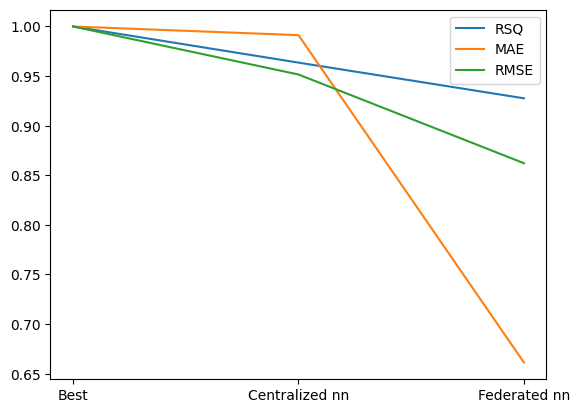

In [113]:
plt.plot(['Best', 'Centralized nn', 'Federated nn'], np.array(((1- abs(np.matrix(tab1) - np.matrix(tab1)[0]) / np.matrix(tab1)[0]))).transpose()[0], label = 'RSQ')
plt.plot(['Best', 'Centralized nn', 'Federated nn'], np.array(((1- abs(np.matrix(tab1) - np.matrix(tab1)[0]) / np.matrix(tab1)[0]))).transpose()[1], label = 'MAE')
plt.plot(['Best', 'Centralized nn', 'Federated nn'], np.array(((1- abs(np.matrix(tab1) - np.matrix(tab1)[0]) / np.matrix(tab1)[0]))).transpose()[2], label = 'RMSE')
plt.legend()
#plt.#label(['R^2', 'MAE', 'RMSE'])

In [59]:
((np.abs(np.matrix(tab1)[1:]-np.matrix(tab1)[0])) /np.matrix(tab1)[0])#.transpose()

matrix([[0.03643677, 0.00873917, 0.04840822],
        [0.07240033, 0.33869883, 0.13781852]])

In [53]:
((np.abs(np.matrix(tab1)[2]-np.matrix(tab1)[0])) /np.matrix(tab1)[0]).transpose()

matrix([[0.07240033],
        [0.33869883],
        [0.13781852]])

In [54]:
((np.abs(np.matrix(tab1)[2]-np.matrix(tab1)[1])) /np.matrix(tab1)[0]).transpose()

matrix([[0.03596356],
        [0.32995967],
        [0.0894103 ]])

In [55]:
1 - 0.7841 / 0.8453

0.07240033124334555

In [56]:
plt.figure(dpi = 1200)


<Figure size 7680x5760 with 0 Axes>

<Figure size 7680x5760 with 0 Axes>

In [102]:
tab1

,rsq,mae,rmse
0,0.8453,2677.6,4658.3
1,0.8145,2701.0,4883.8
2,0.7841,3584.5,5300.3


In [103]:
from pycaret.datasets import get_data
df = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.charges.var()

146652372.15285498

In [109]:
tab1.assign(rsq2 = lambda x: 1 - x.rmse ** 2 / df.charges.var())

,rsq,mae,rmse,rsq2
0,0.8453,2677.6,4658.3,0.852033
1,0.8145,2701.0,4883.8,0.837360
2,0.7841,3584.5,5300.3,0.808437


In [120]:
df.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [123]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import error

In [205]:
yt = np.ones(100) * 1000

np.random.seed(1)
y0 = np.append(np.random.normal(loc = 1000, scale = 130, size = 100- 10), [10000]*10)
#y0 = np.random.normal(loc = 1000, scale = 100, size = 100)
np.random.seed(1)
y1 = np.random.normal(loc = 1000, scale = 130, size = 100)
np.random.seed(1)
y2 = np.append(np.random.normal(loc = 1000, scale = 150, size = 100- 10), [10000]*10)

y = [y0, y1, y2]

In [206]:
maes  = np.array([        mae(yt, yd) for yd in y])
rmses = np.array([np.sqrt(mse(yt, yd)) for yd in y])


print((1 -  maes /  maes[0])[1:])
print((1 - rmses / rmses[0])[1:])

print(rmses)
print(maes)



[ 0.90667349 -0.013424  ]
[ 9.59505716e-01 -2.60610636e-04]
[2848.29120811  115.33951405 2849.0335031 ]
[986.03773311  92.02346284 999.27430743]


In [219]:
y = [np.append(y0[:(1000 - i - 1)], np.random.normal(loc = 1000, scale = 1000, size = i)) for i in range(10)]
len(y[0])

100

In [222]:
len(y[0])

100

In [220]:
np.array([        mae(yt, yd) for yd in y])

ValueError: Found input variables with inconsistent numbers of samples: [100, 101]

In [228]:

for i in range(len(y)): 
    print(len(y[i]))
    
    #print(mse(y[i], yt))
#[        mae(yt, yd) for yd in y]

100
101
102
103
104
105
106
107
108
109


In [235]:
y0[:99]

array([1019.07948424, 1074.33463425,  995.21370465, 1014.60790354,
        980.43443767, 1119.01490485,  943.03396525, 1024.11963073,
       1051.2756439 , 1094.31793257, 1194.46501956, 1087.8089952 ,
       1077.89772061,  808.86917843, 1078.83251276, 1298.18328961,
        892.09857188,  867.46241958,  972.09500051, 1132.76225639,
       1068.217564  ,  937.97385316,  995.32127638, 1134.81506763,
       1087.44056726, 1315.75400604, 1130.73926844, 1045.96373808,
       1079.91441586,  954.63205518,  872.8895098 , 1022.35442718,
       1063.7729357 ,  818.61320674,  932.09365953,  951.99673276,
       1034.53351233,  966.13941235, 1057.86257234, 1012.75459201,
       1137.84257619,  777.54820425, 1215.42620295, 1184.29762169,
       1006.5412212 , 1084.54201785, 1078.85129205,  904.15234839,
       1021.40645856, 1101.16264328, 1040.27617862, 1136.67169982,
       1012.34949431, 1010.49762852,  900.18551302,  952.61005354,
        940.23670147, 1221.71285731, 1031.26572178,  870.07455

In [238]:
y = [np.append(y0[:(100 -  i - 1)], np.random.normal(loc = 1000, scale = 1000, size = i)) for i in range(10)]
for yi in y:
    print(len(yi))

99
99
99
99
99
99
99
99
99
99


In [403]:
yt = np.ones(100) * 1000
np.random.seed(1)
y0 = np.random.normal(loc = 1000, scale = 130, size = 100)
yt = np.array([np.mean(y0)] * len(y0))

eps = 100
y = [y0] + [np.append(y0[:(len(y0) - i * 10)], 
                      [1000 - eps] * i * 5 + [1000 + eps] * i * 5
                      #np.random.normal(loc = 1000, scale = 100, size = i * 10)
                      ) for i in range(1, 10)]
maes  = np.array([        mae(yt, yd) for yd in y])
rmses = np.array([np.sqrt(mse(yt, yd)) for yd in y])

print(maes.round(2))
print(rmses.round(2))

print('mae: ', (maes  /  maes[0] - 1)[1:].round(4))
print('rmse:', (rmses / rmses[0] - 1)[1:].round(4))
print('frac:', ((maes /  maes[0] - 1) / (rmses / rmses[0]- 1))[1:].round(4))

[ 91.67  95.8  101.38 101.86  99.51 102.03 102.75 103.26 104.04 103.26]
[115.07 117.11 119.86 117.76 112.94 114.18 111.71 110.81 110.75 107.21]
mae:  [0.045  0.106  0.1112 0.0856 0.113  0.1209 0.1265 0.135  0.1265]
rmse: [ 0.0177  0.0416  0.0234 -0.0185 -0.0077 -0.0292 -0.037  -0.0376 -0.0683]
frac: [  2.5439   2.5448   4.7497  -4.6268 -14.6378  -4.1431  -3.4199  -3.5942
  -1.8519]


In [404]:
[np.std(yd) for yd in y]

[115.07030779810606,
 117.10401412135985,
 119.83147117234473,
 117.75609759048945,
 112.71013709573779,
 113.78323271689182,
 111.00634142500873,
 110.34304869372002,
 110.16554457938055,
 106.82311179242183]

In [414]:
for i in range(1,10):
    x = np.array([-i,1,2* i] * i)
    print("mae:", mae(x, [np.mean(x)]*len(x)).round(2), "rmse:", np.sqrt(mse(x, [np.mean(x)]*len(x))).round(2))    

mae: 1.11 rmse: 1.25
mae: 2.0 rmse: 2.45
mae: 3.11 rmse: 3.68
mae: 4.22 rmse: 4.92
mae: 5.33 rmse: 6.16
mae: 6.44 rmse: 7.41
mae: 7.56 rmse: 8.65
mae: 8.67 rmse: 9.9
mae: 9.78 rmse: 11.15


variance/outliers decrease -> mae gets faster high than rmse

In [309]:
y = np.array([1,-1,1,-1,1,-1,1,-1,1,-1,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10,-10,10])
y0 = np.array([np.mean(y)] * len(y))

print('rmse: ', np.sqrt(mse(y,y0)))
print('mae:  ', mae(y,y0))


rmse:  8.955445270895245
mae:   8.2


In [155]:
np.append(np.random.normal(loc = 1, scale = 1, size = 10), 10)

array([ 0.30833925,  0.60324647,  0.3128273 ,  0.15479436,  0.32875387,
        0.9873354 , -0.11731035,  1.2344157 ,  2.65980218,  1.74204416,
       10.        ])

In [426]:
y = np.random.binomial(10,.5, 100)
y0 = np.array([np.mean(y)] * len(y))
print('rmse:',np.sqrt(mse(y,y0)).round(2),'| mae:', mae(y,y0).round(2))

rmse: 1.43 | mae: 1.09


In [430]:
y = np.append(np.random.binomial(10,.1, 100),[])
y0 = np.array([np.mean(y)] * len(y))
print('rmse:',np.sqrt(mse(y,y0)).round(2),'| mae:', mae(y,y0).round(2))

rmse: 1.03 | mae: 0.87


In [432]:
y = np.append(np.random.binomial(10,.5, 100-10),[10]*10)
y0 = np.array([np.mean(y)] * len(y))
print('rmse:',np.sqrt(mse(y,y0)).round(2),'| mae:', mae(y,y0).round(2))

rmse: 2.03 | mae: 1.55


In [436]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64